In [4]:
from keras.datasets import cifar10

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\python27\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import sys, keras
from PIL import Image


In [6]:
#load the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [7]:
#lets determine the dataset characteristics
print("training images:{}".format(X_train.shape))
print("testing images:{}".format(X_test.shape))
#A single image
print(X_train[0].shape)

training images:(50000, 3, 32, 32)
testing images:(10000, 3, 32, 32)
(3, 32, 32)


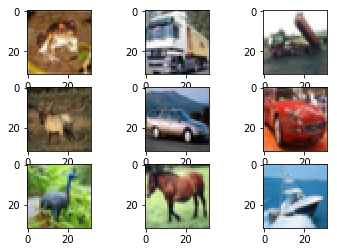

MemoryError: 

In [8]:
for i in range(0,9):
    plt.subplot(330+1+i)
    img = X_train[i].transpose([1,2,0])
    plt.imshow(img)
    
#show the plot
plt.show()
#preprocessing the data
#fix the random seed for reproducibility
seed = 6
np.random.seed(seed)
#load the data
(X_train,y_train), (X_test,y_test) = cifar10.load_data()
#normalize the inputs from 0-255 to 0.0-1.0

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train[0])

In [ ]:
#class lables shape
print(y_train.shape)
print(y_train[0])


In [ ]:
#hot encode the outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_class = Y_test.shape[1]
print(num_class)
print(Y_train.shape)
print(Y_train[0])

In [ ]:
#start by importing necessary data
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD
#define the model function


In [2]:
def allcnn(weights=None):
    #define model type -sequential
    model = Sequential()
    #add model layers
    model.add(Conv2D(96,(3,3),padding = 'same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding = 'same'))
    model.add(Conv2D(96,(3,3), padding='same', strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Activation('relu'))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    #add global avg pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    
    model.add(Activation('softmax'))
    #load the weights
    if weights:
        model.load_weights(weights)
    return model

In [38]:
#define hyperparameters
learning_rate = 0.01
weight_decay = 1e-6
momentum=0.9

#build model
model = allcnn()
#define optimizer and compile model
sgd = SGD(lr=learning_rate,decay =weight_decay,momentum=momentum,nesterov=True)

KeyboardInterrupt: 

In [ ]:
 model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
#print model summary
print model.summary()

In [ ]:
#define additional training parameters
epochs = 350
batch_size=32
#fit the model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=batch_size,verbose =1)

In [3]:
learning_rate = 0.01
weight_decay = 1e-6
momentum=0.9

#build model & define weights
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'

model = allcnn(weights)
#define optimizer and compile model
sgd = SGD(lr=learning_rate,decay =weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
#print model summary
print model.summary()

scores =model.evaluate(X_test,Y_test,verbose=1)
print('accuracy:{}'.format(scores[1]))

NameError: global name 'Sequential' is not defined

In [9]:
classes = range(0,10)
names=['airplane',
      'automobile',
      'bird',
      'cat',
      'deer',
      'dog',
      'frog',
      'horse',
      'ship',
      'truck']
class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [10]:
#generate a batch of 9 images to predict
batch = X_test[100:109]
labels =np.argmax(Y_test[100:109],axis=-1)
#make predictions
predictions=model.predict(batch,verbose=1)

NameError: name 'Y_test' is not defined

In [11]:
#print em out
print predictions.shape


NameError: name 'predictions' is not defined

In [12]:
#these are class probs, should sum to 1
for image in  predictions:
    print(np.sum(image))

NameError: name 'predictions' is not defined

In [14]:
class_result=np.argmax(predictions,axis=1)

NameError: name 'predictions' is not defined

NameError: name 'class_result' is not defined

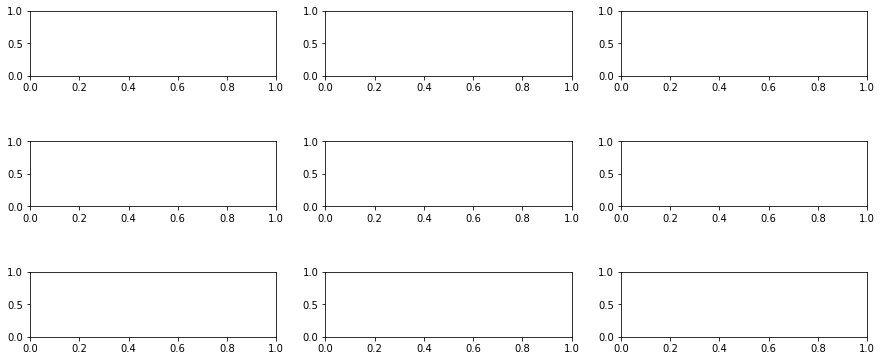

In [15]:
#grid 3 x 3 images
fig,axs = plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
for i ,img in enumerate(batch):
    #determine label for each prediction,set title:
    for key,value in class_labels.items():
        if class_result[i]==key:
            title='prediction:{}\nActual value:{}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    #plot img
    
    axs[i].imshow(img.transpose([1,2,0]))
#show the plot
plt.show()
            
                        